# Machine Learning assignment - CHME0016 - CVWQ8

# ILPD (Indian Liver Patient Dataset) Dataset 

#####  The following is the text description as given on the UC Irvine Machine Learning Repository.
##### Correction - There are 406 liver patient records and 164 non liver patient records in this dataset.

##### Data Set Information:

This data set contains 416 (actual = 406) liver patient records and 167 (actual = 164) non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records. 

Any patient whose age exceeded 89 is listed as being of age "90".


##### Attribute Information:

1. (Age)	        Age of the patient 
2. (Gender)	    Gender of the patient 
3. (TB)	        Total Bilirubin 
4. (DB)	        Direct Bilirubin 
5. (Alkphos)      Alkaline Phosphotase 
6. (Sgpt)         Alamine Aminotransferase 
7. (Sgot)         Aspartate Aminotransferase 
8. (TP)	        Total Protiens 
9. (ALB)	        Albumin 
10. (A/G Ratio)	Albumin and Globulin Ratio 
11. Selector field used to split the data into two sets (labeled by the experts) 


##### Relevant Papers:

1. Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Comparative Study of Liver Patients from USA and INDIA: An Exploratory Analysis, International Journal of Computer Science Issues, ISSN :1694-0784, May 2012. 
2. Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Study of Selected Classification Algorithms for Liver Disease Diagnosis, International Journal of Database Management Systems (IJDMS), Vol.3, No.2, ISSN : 0975-5705, PP 101-114, May 2011.
    
Links:
    
http://archive.ics.uci.edu/ml/datasets/ILPD+%28Indian+Liver+Patient+Dataset%29#
https://pdfs.semanticscholar.org/c137/695d5bf4c5edb0a6e956c06c1d87008cff8e.pdf
https://pdfs.semanticscholar.org/c92d/38a7a76c20a317de63fb9278bb10102c758b.pdf


# 1/. Preliminaries

In [1]:
# Suppression of warnings

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
# Importing required libraries

import pandas as pd
import numpy as np
import os
import csv as csv
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
from scipy import stats
from scipy.stats import linregress

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import precision_score, f1_score, recall_score, auc, confusion_matrix, roc_curve, roc_auc_score


/Users/db/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Loading of data

url = ('http://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv')
    
features = 'Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio', 'Selector'
df_ilpd = pd.read_csv(url, header=None, names=features, index_col=False)

df_ilpd = df_ilpd.drop_duplicates()
df_ilpd = df_ilpd.round(3)

df_ilpd.head(570)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [4]:
df_ilpd.shape

(570, 11)

In [5]:
# Converting the original Selector 1 and 2 class options to '1' and '0' respectively.
df_ilpd = pd.DataFrame(df_ilpd)
df_ilpd['Selector'] = np.where(df_ilpd['Selector'] == 2, '0', '1').astype(int)

# Converting the Gender from Male and Female to '1' and '0' respectively.
df_ilpd['Gender'] = np.where(df_ilpd['Gender'] == 'Female', '0', '1').astype(int)

df_ilpd.head(570)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [6]:
df_ilpd.shape

(570, 11)

In [7]:
# Assigning data ranges to X ad Y variables

X = df_ilpd.iloc[:, :-1].values
y = df_ilpd.iloc[:, 10].values

In [8]:
# Checking for missing data

df_ilpd_nan = df_ilpd.isnull().sum()
print(df_ilpd_nan)

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64


In [9]:
# Locating NaN values in the df_ilpd dataframe.

print(df_ilpd[df_ilpd["A/G Ratio"].isnull()])

     Age  Gender   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio  Selector
209   45       0  0.9  0.3      189    23    33  6.6  3.9        NaN         1
241   51       1  0.8  0.2      230    24    46  6.5  3.1        NaN         1
253   35       0  0.6  0.2      180    12    15  5.2  2.7        NaN         0
312   27       1  1.3  0.6      106    25    54  8.5  4.8        NaN         0


In [10]:
# Replacing NANs in the A/G Ratio feature with its mean value.
# (The mean value was used to make certain of this step)

df_ilpd = df_ilpd.replace(np.nan, (np.mean(df_ilpd['A/G Ratio']))) 
with pd.option_context('display.max_rows', 10000):
    print df_ilpd

     Age  Gender    TB    DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio  \
0     65       0   0.7   0.1      187    16    18  6.8  3.3   0.900000   
1     62       1  10.9   5.5      699    64   100  7.5  3.2   0.740000   
2     62       1   7.3   4.1      490    60    68  7.0  3.3   0.890000   
3     58       1   1.0   0.4      182    14    20  6.8  3.4   1.000000   
4     72       1   3.9   2.0      195    27    59  7.3  2.4   0.400000   
5     46       1   1.8   0.7      208    19    14  7.6  4.4   1.300000   
6     26       0   0.9   0.2      154    16    12  7.0  3.5   1.000000   
7     29       0   0.9   0.3      202    14    11  6.7  3.6   1.100000   
8     17       1   0.9   0.3      202    22    19  7.4  4.1   1.200000   
9     55       1   0.7   0.2      290    53    58  6.8  3.4   1.000000   
10    57       1   0.6   0.1      210    51    59  5.9  2.7   0.800000   
11    72       1   2.7   1.3      260    31    56  7.4  3.0   0.600000   
12    64       1   0.9   0.3      310 

In [11]:
# Sanity checking for missing data
df_ilpd_nann = df_ilpd.isnull().sum()
print(df_ilpd_nann)

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    0
Selector     0
dtype: int64


In [12]:
# A further imputation step was carried out as a safeguard against any missing data entries not located

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
X[:, 2:10] = imputer.fit_transform(X[:, 2:10])

In [13]:
# Categorical values were encoded

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
onehotencoder_X = OneHotEncoder(categorical_features = [1])
onehotencoder_X.fit_transform(X).toarray()

array([[ 1.  ,  0.  , 65.  , ...,  6.8 ,  3.3 ,  0.9 ],
       [ 0.  ,  1.  , 62.  , ...,  7.5 ,  3.2 ,  0.74],
       [ 0.  ,  1.  , 62.  , ...,  7.  ,  3.3 ,  0.89],
       ...,
       [ 0.  ,  1.  , 52.  , ...,  6.4 ,  3.2 ,  1.  ],
       [ 0.  ,  1.  , 31.  , ...,  6.8 ,  3.4 ,  1.  ],
       [ 0.  ,  1.  , 38.  , ...,  7.3 ,  4.4 ,  1.5 ]])

In [14]:
# Sanity checking for missing data

df_ilpd_miss = df_ilpd.isnull().sum()
print(df_ilpd_miss)

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    0
Selector     0
dtype: int64


# 2/. Data Exploration

In [15]:
# Feature headings

cols = ['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio']
for col in cols:
    print (col, df_ilpd[df_ilpd[col]==0].shape)

('Age', (0, 11))
('TB', (0, 11))
('DB', (0, 11))
('Alkphos', (0, 11))
('Sgpt', (0, 11))
('Sgot', (0, 11))
('TP', (0, 11))
('ALB', (0, 11))
('A/G Ratio', (0, 11))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114fc22d0>,
      dtype=object)

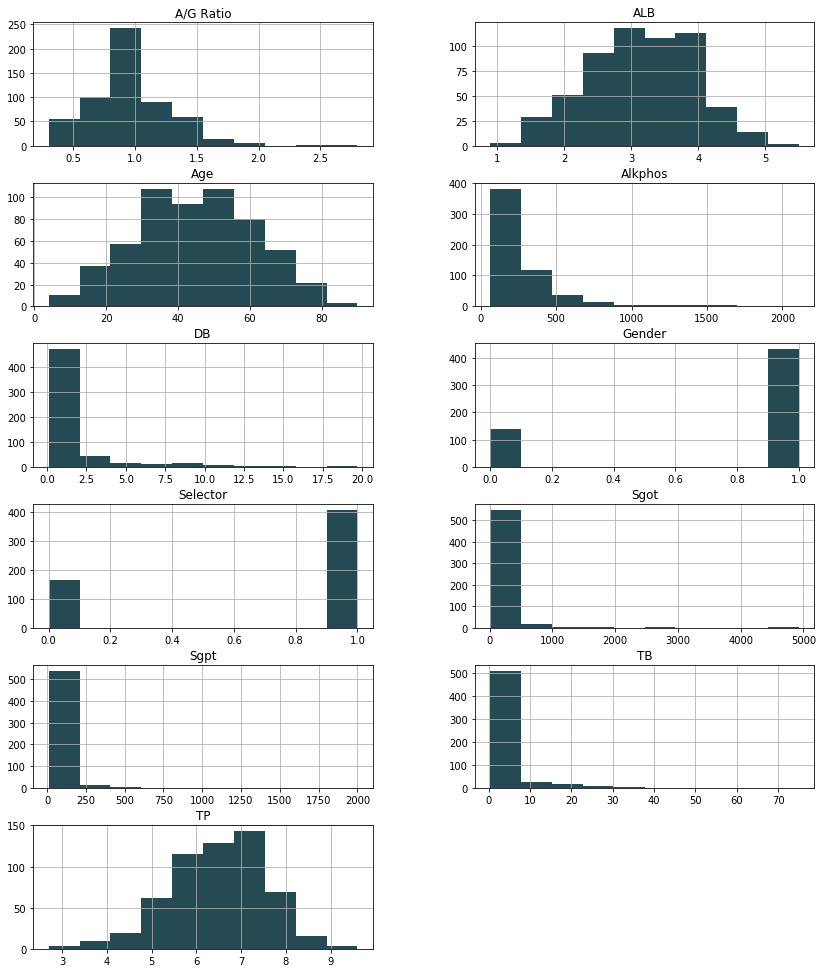

In [16]:
# Histrogram for feature distribution analysis

df_ilpd.hist(alpha=0.9, layout=(7,2), sharex=False, sharey=False, figsize=(14, 20), color='#0E3640')
#plt.savefig('Fig1')

Age             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
Gender       AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
TB              AxesSubplot(0.125,0.677439;0.352273x0.0920732)
DB           AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
Alkphos         AxesSubplot(0.125,0.566951;0.352273x0.0920732)
Sgpt         AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
Sgot            AxesSubplot(0.125,0.456463;0.352273x0.0920732)
TP           AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
ALB             AxesSubplot(0.125,0.345976;0.352273x0.0920732)
A/G Ratio    AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
Selector        AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

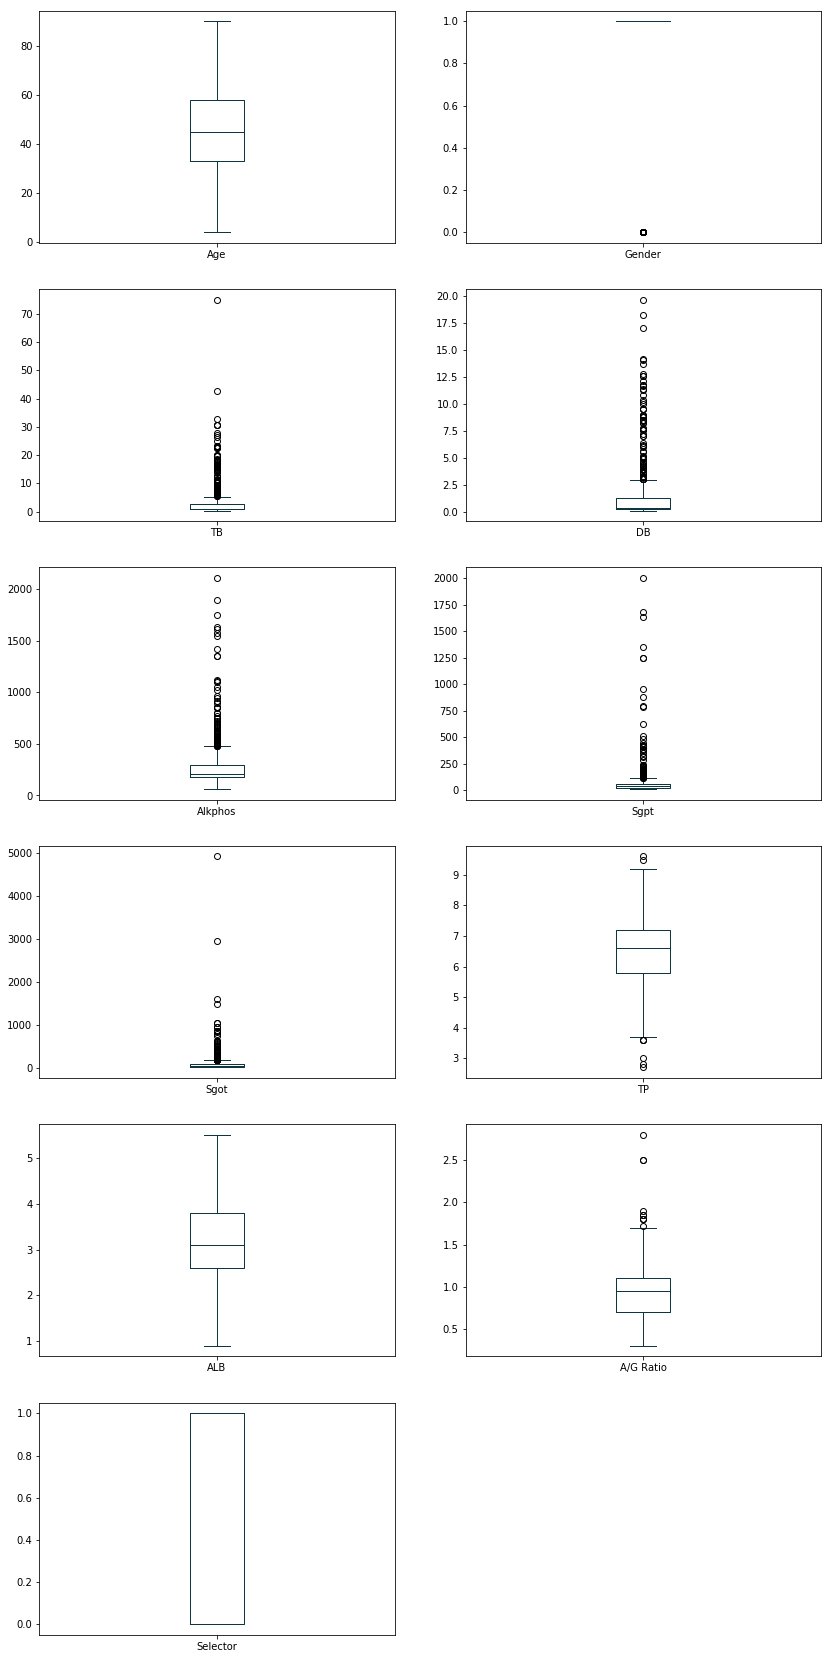

In [17]:
# Boxplots for variance, mean and confidence interval analysis

df_ilpd.plot(kind= 'box', subplots=True, layout=(7,2), sharex=False, sharey=False, figsize=(14,35), color='#0E3640')
#plt.savefig('Fig2')

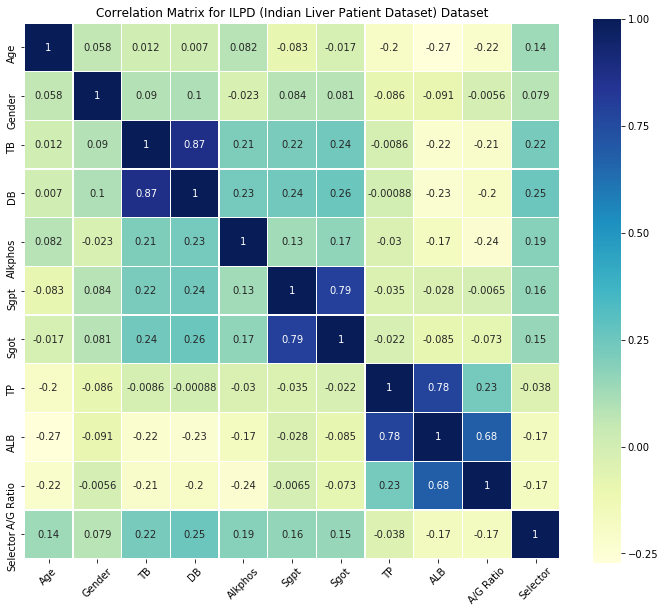

In [18]:
# Correlation-matrix heatmap of the dataframe

plt.subplots(figsize=(12, 10))
corr = df_ilpd.corr()
ax = sns.heatmap(corr, linewidths=0.25, vmax=1.0, square=True, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix for ILPD (Indian Liver Patient Dataset) Dataset')
plt.setp(ax.axes.get_xticklabels(), rotation=45)
plt.rcParams['figure.figsize']=(40,40)

#plt.savefig('Fig3')
plt.show()


In [19]:
# Statistics of df_ilpd dataframe.

df_ilpd.describe()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,44.849123,0.754386,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.318510,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.948004,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [20]:
# Statistical analysis of the (df_ilpd) dataframe to ascertain statistical imformation, such as the slope, 
# intercept, r value, p value and standard deviation for all features.

df_stat = df_ilpd.iloc[:, [0,2,3,4,5,6,7,8,9,10]]
for i in df_stat.columns.values:
    print('\n' + i + '\n' + str(linregress(df_stat[i], df_stat['Selector']))+ '\n' + '\n')


Age
LinregressResult(slope=0.0038522923363545386, intercept=0.5395087696726887, rvalue=0.13809318041844038, pvalue=0.0009479292716648726, stderr=0.0011592895094448678)



TB
LinregressResult(slope=0.016223585803814704, intercept=0.6583899344544863, rvalue=0.22442971741356624, pvalue=6.106350132486529e-08, stderr=0.0029557645104279335)



DB
LinregressResult(slope=0.0400871664081826, intercept=0.6522484118490796, rvalue=0.2506663340648873, pvalue=1.2903824781010282e-09, stderr=0.006495962866530003)



Alkphos
LinregressResult(slope=0.00034645596123017804, intercept=0.6112018711567436, rvalue=0.18755981377621073, pvalue=6.538991047831513e-06, stderr=7.613029674385158e-05)



Sgpt
LinregressResult(slope=0.00040427389840208994, intercept=0.680048724012486, rvalue=0.16191728893425514, pvalue=0.00010322353521364301, stderr=0.00010338067386463133)



Sgot
LinregressResult(slope=0.00023536556380389668, intercept=0.686536251216699, rvalue=0.15110067538891, pvalue=0.0002941855097133844, stderr=

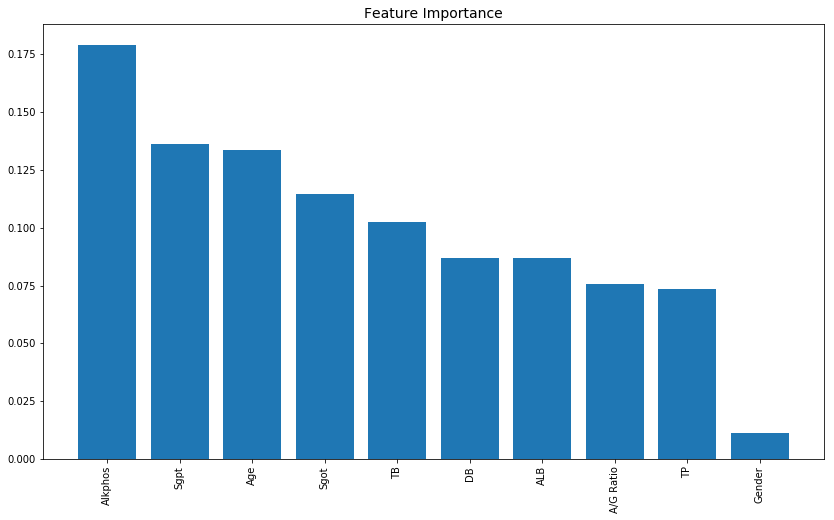

In [21]:
# Evaluation of which features are most important in the dataframe

# Random forest regressor object
clf = RandomForestRegressor(random_state=120211, n_jobs=-1)
model = clf.fit(X, y)

# Calculation of feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [df_ilpd.columns.values[i] for i in indices]

plt.figure(figsize=(14, 8))
plt.title('Feature Importance', fontsize=14)
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90, fontsize=10)
fig = plt.gcf()

#plt.savefig('Fig4')
plt.show()

# 3/. Further Data Exploration

In [22]:
# Number and percentage of patients with and patients without liver disease.

df_total = (len(df_ilpd.Selector))     
df_with = (len(df_ilpd[df_ilpd.Selector.isin([1])]))  
df_without = (len(df_ilpd[df_ilpd.Selector.isin([0])]))   
print 'Total number of patients:', (df_total)
print 'Number of patients with liver disease:', (df_with)
print 'Number of patients without liver disease:', (df_without)

# Calculating the percentage of patients with '1' and without '0' liver disease.
df_per_all = ((df_ilpd['Selector'].value_counts()/df_ilpd['Selector'].count())*100).round(2)

print 'Percentage of patients with liver disease:', 
(df_per_all)

Total number of patients: 570
Number of patients with liver disease: 406
Number of patients without liver disease: 164
Percentage of patients with liver disease:

1    71.23
0    28.77
Name: Selector, dtype: float64

/Users/db/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


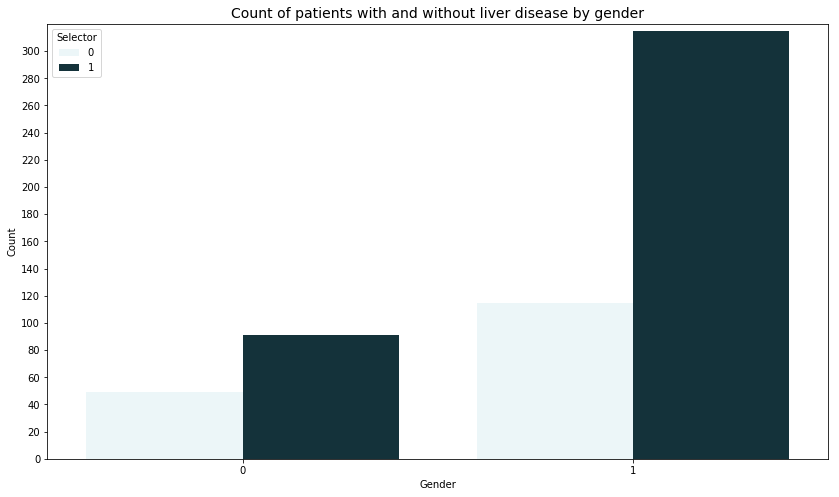

In [23]:
# Bar chart of liver disease patients by gender.
# Where gender is catergorised as male '1' and female '0'.

sns.countplot(df_ilpd.Gender, hue=df_ilpd['Selector'], color='#0E3640')
plt.title('Count of patients with and without liver disease by gender', fontsize=14)
plt.ylim(0, 320), plt.yticks(range(0, 320, 20)), plt.xlabel('Gender', fontsize=10), plt.ylabel('Count', fontsize=10)
fig = plt.gcf()
fig.set_size_inches(14, 8)

#plt.savefig('Fig5')
plt.show()

/Users/db/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


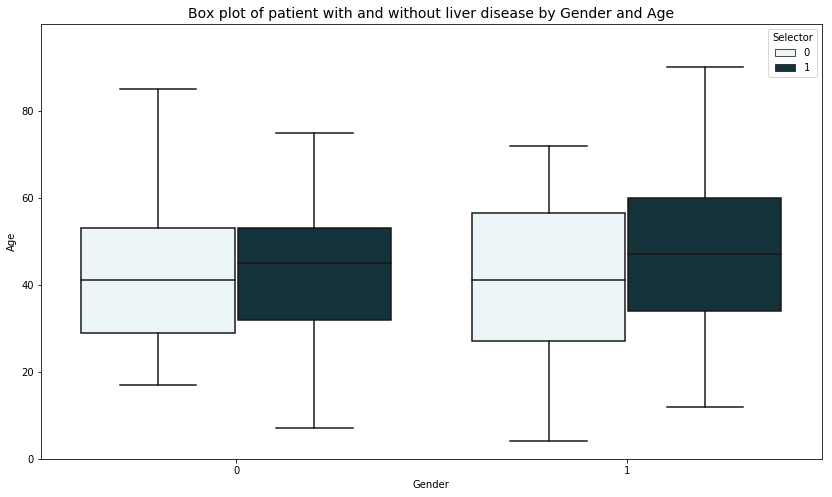

In [24]:
# Box plot of patient with and without liver disease by Gender and Age.

fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(ax=ax, x='Gender', y='Age', hue='Selector', data=df_ilpd, color='#0E3640')
ax.set_title('Box plot of patient with and without liver disease by Gender and Age', fontsize=14)
plt.ylim(0, 100), plt.yticks(range(0, 100, 20)), plt.xlabel('Gender', fontsize=10), plt.ylabel('Age', fontsize=10)

#plt.savefig('Fig6')
plt.show()


In [25]:
# Sanity check of the binary nature of the Gender and Selector features in the dataset

df_ilpd.head(570)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [26]:
# Sanity checking for missing data

df_ilpd_misss = df_ilpd.isnull().sum()
print(df_ilpd_misss)

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    0
Selector     0
dtype: int64


In [27]:
# Observing outliers where in the following array -1 represents a potential outlier.

outlier_detector = EllipticEnvelope(contamination=.1)
outlier_detector.fit(df_ilpd)
outlier_detector.predict(df_ilpd)


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1

In [28]:
# To observe the effects of potential outliers the log was applied to the following features: Alkphos, Sgot, Sgpt and Age
# Common axis for UCLA dataset are Sgot, Sgpt and Alkphos [N. B. Venkateswarlu et. al.]. 
# Inaddition, Age was converted to the same log format based on its p-value for visualisation purposes only

df_ilpd['log of Alkphos'] = [np.log(x) for x in df_ilpd['Alkphos']]
df_ilpd['log of Sgot'] = [np.log(x) for x in df_ilpd['Sgot']]
df_ilpd['log of Sgpt'] = [np.log(x) for x in df_ilpd['Sgpt']]
df_ilpd['log of Age'] = [np.log(x) for x in df_ilpd['Age']]

df_ilpd.round(3)


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector,log of Alkphos,log of Sgot,log of Sgpt,log of Age
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1,5.231,2.890,2.773,4.174
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1,6.550,4.605,4.159,4.127
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1,6.194,4.220,4.094,4.127
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1,5.204,2.996,2.639,4.060
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1,5.273,4.078,3.296,4.277
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1,5.338,2.639,2.944,3.829
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1,5.037,2.485,2.773,3.258
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1,5.308,2.398,2.639,3.367
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,0,5.308,2.944,3.091,2.833
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1,5.670,4.060,3.970,4.007


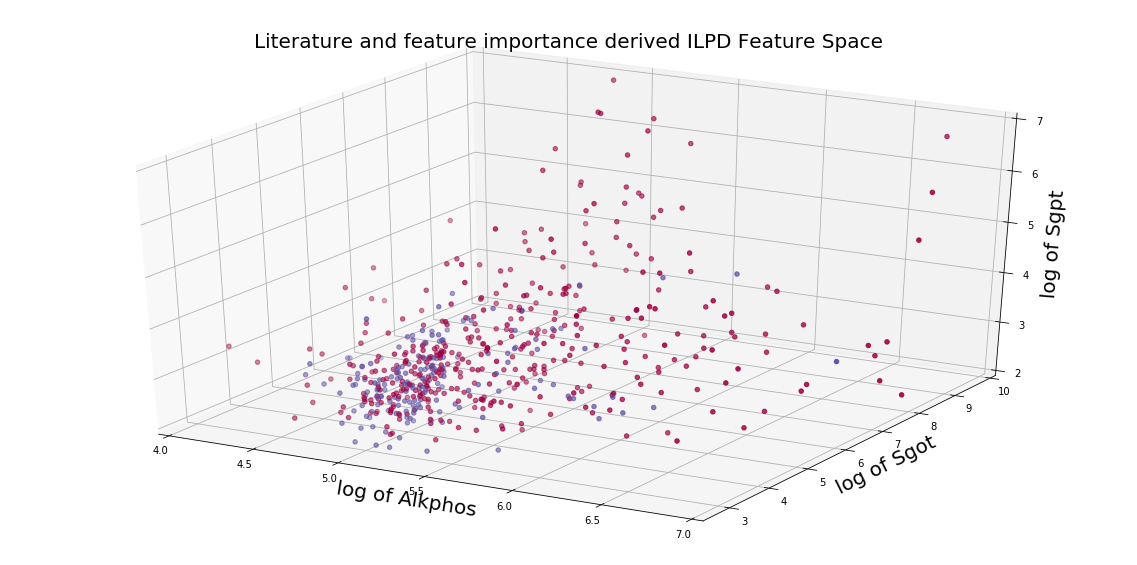

In [29]:
# Common axis for UCLA dataset are Sgot, Sgpt and Alkphos [N. B. Venkateswarlu et. al., 2011] (see assignment description above). 
# The following feature space axis are based on the literature sources and from three of the top four features as suggested 
# by the feature importance plot as previously visualised;  log of Sgot, log of Sgpt and log of Alkphos.

feature1 = df_ilpd['log of Alkphos'].values
feature2 = df_ilpd['log of Sgot'].values 
feature3 = df_ilpd['log of Sgpt'].values

# Ploting the feature space as based on literature
c = df_ilpd['Selector'].values
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, c=c, cmap='Spectral_r')
ax.set_title('Literature and feature importance derived ILPD Feature Space', fontsize=20)
ax.set_xlabel('log of Alkphos', fontsize=20)
ax.set_ylabel('log of Sgot', fontsize=20)
ax.set_zlabel('log of Sgpt', fontsize=20)
ax.set_xlim(4, 7)
ax.set_ylim(2.5, 10)
ax.set_zlim(2, 7)

#plt.savefig('Fig7')
plt.show()


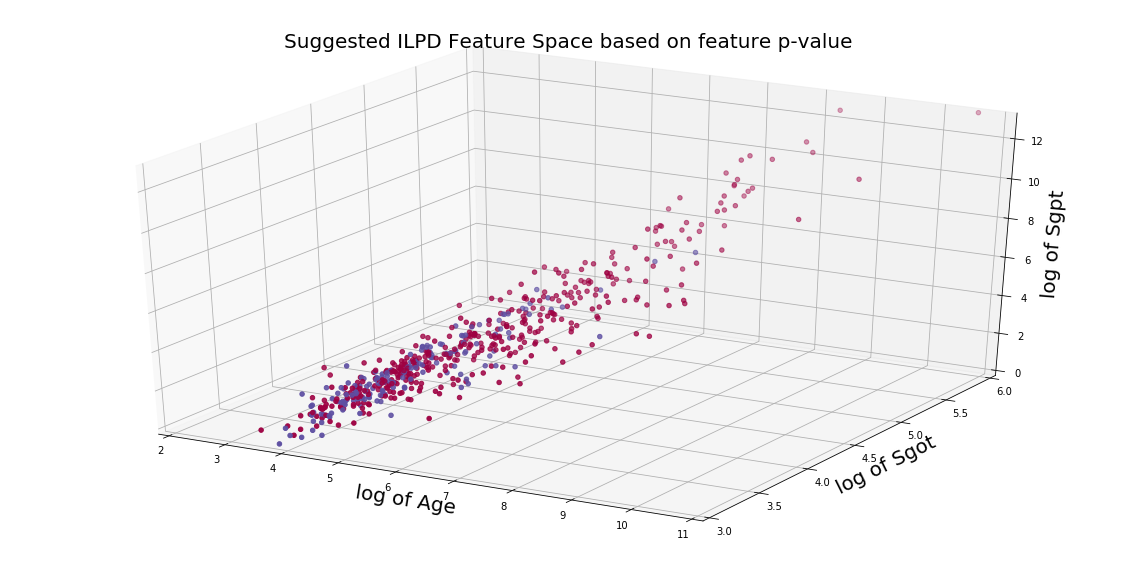

In [30]:
# Axis choosen based on features with statistically significant p-values; Age, Sgot, Sgpt and Alkphos. 

feature4 = df_ilpd['log of Alkphos'].values
feature5 = df_ilpd['log of Sgot'].values 
feature6 = df_ilpd['log of Sgpt'].values

# Ploting the feature space with log of Age instead of log of Alkphos
c = df_ilpd['Selector'].values
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, c=c, cmap='Spectral_r')
ax.set_title('Suggested ILPD Feature Space based on feature p-value', fontsize=20)
ax.set_xlabel('log of Age', fontsize=20)
ax.set_ylabel('log of Sgot', fontsize=20)
ax.set_zlabel('log of Sgpt', fontsize=20)
ax.set_xlim(2, 11)
ax.set_ylim(3, 6)
ax.set_zlim(0, 13)

#plt.savefig('Fig8')
plt.show()


# 4/. Training (75%) and Testing (25%) Datasets

In [31]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

print'Number of instances for training:', len(y_train)
print'Number of instances for test:', len(y_test)

Number of instances for training: 427
Number of instances for test: 143


In [32]:
# Arrays of the training and testing sets for sanity chaecking purposes
print('X_train:' + '\n' + str(X_train) + '\n')
print('X_test:' + '\n' + str(X_test) + '\n')
print('y_train:' + '\n' + str(y_train[:11]) + '\n')
print('y_test:' + '\n' + str(y_test[:11]) + '\n')

X_train:
[[42.   1.  16.4 ...  5.4  2.   0.5]
 [42.   1.   0.8 ...  4.9  2.7  1.2]
 [45.   0.   1.  ...  8.6  4.3  1. ]
 ...
 [68.   0.   0.6 ...  4.6  2.1  0.8]
 [40.   1.   0.7 ...  5.   2.6  1. ]
 [45.   1.   2.4 ...  5.1  2.6  1. ]]

X_test:
[[60.    1.    0.5  ...  5.9   1.6   0.37]
 [20.    0.    0.6  ...  6.1   3.    0.9 ]
 [61.    1.    0.8  ...  6.9   3.4   0.9 ]
 ...
 [52.    0.    0.6  ...  6.9   3.3   0.9 ]
 [45.    1.    2.9  ...  7.2   3.6   1.  ]
 [33.    1.    0.8  ...  7.2   4.4   1.5 ]]

y_train:
[1 1 1 1 1 1 1 1 0 0 1]

y_test:
[0 0 0 1 1 1 0 1 0 1 1]



In [33]:
# Standardisation of the dataset
# Standardisation is where the feature columns are centered at the mean 0 with a standard deviation of 1

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_standardised_total = stdsc.fit_transform(X)
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [34]:
# Dataframe of the mean, standard deviation, min and max values for the standardisation of 
# the feature space, training and test datasets.
# Standardisation is the centering the feature values at the mean 0 with a standard deviation of 1

df_st = {'standardised': [np.mean(X_standardised_total), np.std(X_standardised_total), np.min(X_standardised_total), np.max(X_standardised_total)], 
        'train': [np.mean(X_train_std), np.std(X_train_std), np.min(X_train_std), np.max(X_train_std)], 
        'test': [np.mean(X_test_std), np.std(X_test_std), np.min(X_test_std), (np.max(X_test_std))]}
df_stand = pd.DataFrame(df_st, index = ['Mean', 'Standard deviation', 'Min', 'Max'])  
df_stand.round(5)

,standardised,test,train
Mean,-0.00000,-0.00268,0.00000
Standard deviation,1.00000,0.96771,1.00000
Min,-3.49136,-2.82615,-3.54729
Max,16.58361,6.67222,15.36715


In [35]:
# Shape of the training and testing sets

print"X_train: ", (X_train_std.shape)
print"X_test: ", (X_test_std.shape)
print"y_train: ", (y_train.shape)
print"y_test: ", (y_test.shape)

X_train:  (427, 10)
X_test:  (143, 10)
y_train:  (427,)
y_test:  (143,)


# 5/. Random Forrest Classifier

In [36]:
# Fitting Random Forest Classifier to the dataset

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
# Initial testing set prediction, done prior to any training to act as a baseline

from sklearn.metrics import classification_report

y_pred_test = classifier.predict(X_test_std)
test_acc_pr = classification_report(y_test, y_pred_test, labels=[1, 0])
print(test_acc_pr)

cm_test_pred = confusion_matrix(y_test, y_pred_test)
print(cm_test_pred)

# Finding the accuracy of the baseline testing set
TP = cm_test_pred[1,1]
FP = cm_test_pred[0,1]
TN = cm_test_pred[0,0]
FN = cm_test_pred[1,0]

accuracy_test_pr = float(TP + TN) / float(TP + FP + TN + FN)
accuracy_test_pred = accuracy_test_pr*100

print'\nTest accuracy mean: {0:.2f}%' .format(np.mean(accuracy_test_pred))

             precision    recall  f1-score   support

          1       0.78      0.74      0.76       103
          0       0.40      0.45      0.42        40

avg / total       0.67      0.66      0.66       143

[[18 22]
 [27 76]]

Test accuracy mean: 65.73%


In [38]:
# Initial Gridsearch to determine the best tuning parameters for the Random Forest Classification

from sklearn.metrics import roc_auc_score

parameters = [{'criterion' : ['gini', 'entropy'],
               'max_depth' : [5, 7, 9, 10, 11, 12],
               'max_features' : [3, 5, 7, 10],
               'min_samples_leaf' : [1, 3, 5],
               'min_samples_split' : [2, 3, 4],
               'class_weight' : ['balanced'],
               'n_estimators' : [14, 15, 16, 17, 18, 19, 200],
               'random_state' : [120211]}]

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1, cv = 10)
grid_search.fit(X_train_std, y_train)

# Computational time to complete the grid search
%time grid_search.fit(X_train_std, y_train)

# Calculating the best accuracy and best parameters for tuning of the hyperparameters
gs_score = grid_search.best_score_
print'\nBest accuracy - training set: \n', (gs_score)

gs_par = grid_search.best_params_
print'\nBest parameters - training set: \n', (gs_par)

CPU times: user 2min 41s, sys: 16.4 s, total: 2min 57s
Wall time: 42min 27s
Best accuracy - training set: 
0.7049180327868853

Best parameters - training set: 
{'min_samples_leaf': 1, 'n_estimators': 19, 'min_samples_split': 2, 'random_state': 120211, 'criterion': 'gini', 'max_features': 3, 'max_depth': 12, 'class_weight': 'balanced'}


In [39]:
# Viewing the complete grid_search results
#grid_search.grid_scores_

In [40]:
# Gridsearch to generate an auc object

grid_search_auc = GridSearchCV(estimator = classifier, 
                             param_grid = parameters, 
                             scoring = 'roc_auc',
                             n_jobs = -1, cv = 10)
grid_search_auc.fit(X_train_std, y_train) 
y_pred_auc_tr = grid_search_auc.predict(X_train_std)

# Calculating AUC for the training set
gs_auc = grid_search_auc.best_score_
print'Best AUC training score: \n', (gs_auc)

gs_par_auc = grid_search_auc.best_params_
print'\nBest AUC training parameters: \n', (gs_par_auc)

Best AUC training score: 
0.7360231518877739

Best AUC training parameters: 
{'min_samples_leaf': 5, 'n_estimators': 200, 'min_samples_split': 2, 'random_state': 120211, 'criterion': 'entropy', 'max_features': 3, 'max_depth': 5, 'class_weight': 'balanced'}


In [41]:
# Viewing the complete grid_search_auc results
#grid_search_auc.grid_scores_

In [42]:
# Calculating AUC for the testing set, along with predictions for both the training and the testing sets

y_pred_auc_tr = grid_search_auc.predict(X_train_std)
y_pred_auc = grid_search_auc.predict(X_test_std)

test_auc = (roc_auc_score(y_test, y_pred_auc)*100)
print'AUC testing score: \n {0:.2f}%' .format(test_auc)

AUC testing score: 
 71.27%


In [43]:
# Random Forest Classifier hyperparameter tuning based on best_params results from the initial GridSearch
from sklearn.metrics import accuracy_score, make_scorer
classifier = RandomForestClassifier(criterion = 'gini',
                                    max_depth = 12,
                                    max_features = 3,
                                    min_samples_leaf = 1,
                                    min_samples_split = 2,
                                    class_weight = 'balanced',
                                    n_estimators = 19,
                                    random_state = 120211)

# Computational time to complete the random forest modelling
%time classifier.fit(X_train_std, y_train)

classifier.fit(X_train_std, y_train)

CPU times: user 106 ms, sys: 6.55 ms, total: 112 ms
Wall time: 169 ms


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=12, max_features=1,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=17, n_jobs=1, oob_score=False,
            random_state=120211, verbose=0, warm_start=False)

In [44]:
# Training set optimised with Gridsearch carried out using tuned hyperparameters
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred_train = classifier.predict(X_train_std)
train_acc_opt = classification_report(y_train, y_pred_train)
print(train_acc_opt)

cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)

# Finding accuracy of the optimised training set
TP = cm_train[1,1]
FP = cm_train[0,1]
TN = cm_train[0,0]
FN = cm_train[1,0]

accuracy_tr = float(TP + TN) / float(TP + FP + TN + FN)
accuracy_train = accuracy_tr*100
train_acc_std = np.mean(accuracy_train)
print'\nTraining accuracy mean: {0:.2f}%' .format(np.mean(train_acc_std))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       124
          1       0.99      1.00      0.99       303

avg / total       0.99      0.99      0.99       427

[[121   3]
 [  1 302]]

Training accuracy mean: 99.06%


In [45]:
# Testing set optimised with Gridsearch carried out using tuned hyperparameters

y_pred_test = classifier.predict(X_test_std)
test_acc_opt = classification_report(y_test, y_pred_test)
print(test_acc_opt)

cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

# Finding accuracy of the optimised testing set
TP = cm_test[1,1]
FP = cm_test[0,1]
TN = cm_test[0,0]
FN = cm_test[1,0]

accuracy_te = float(TP + TN) / float(TP + FP + TN + FN)
accuracy_test = accuracy_te*100
test_acc_std = np.mean(accuracy_test)
print'\nTest accuracy mean: {0:.2f}%' .format(np.mean(test_acc_std))

             precision    recall  f1-score   support

          0       0.42      0.33      0.37        40
          1       0.76      0.83      0.79       103

avg / total       0.66      0.69      0.67       143

[[13 27]
 [18 85]]

Test accuracy mean: 68.53%


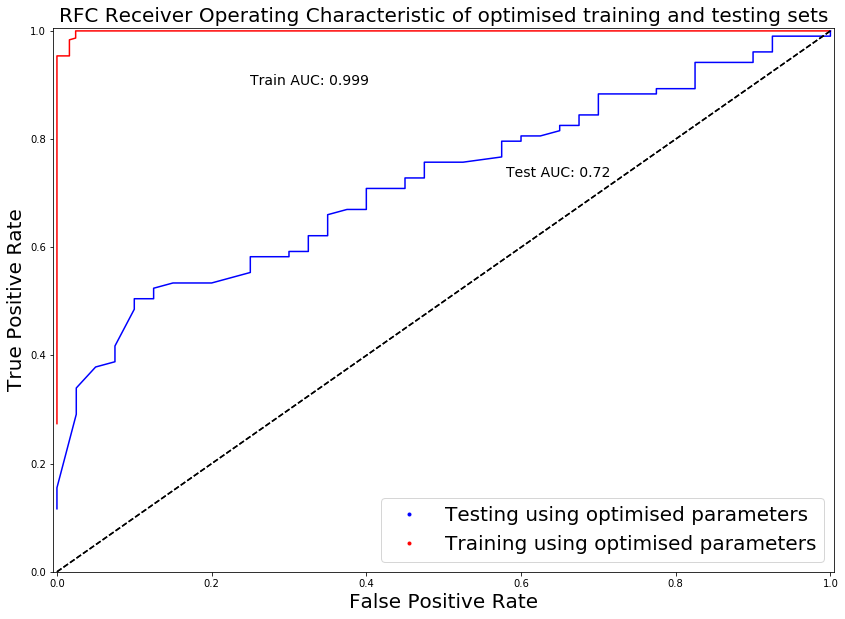

In [46]:
# ROC plot of optimised training and testing sets

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn import metrics

probs_train_rf = classifier.predict_proba(X_train_std)
preds_train_rf = probs_train_rf[:,1]
fpr_train_rf, tpr_train_rf, threshold = metrics.roc_curve(y_train, preds_train_rf)
roc_auc = metrics.auc(fpr_train_rf, tpr_train_rf)

probs_test_rf = classifier.predict_proba(X_test_std)
preds_test_rf = probs_test_rf[:,1]
fpr_test_rf, tpr_test_rf, threshold_test_rf = metrics.roc_curve(y_test, preds_test_rf)
roc_auc1 = metrics.auc(fpr_test_rf, tpr_test_rf)

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
plt.title('RFC Receiver Operating Characteristic of optimised training and testing sets', fontsize=20)

custom = [Line2D([], [], marker='.', color='b', linestyle='None'),
          Line2D([], [], marker='.', color='r', linestyle='None')]
plt.plot(fpr_train_rf, tpr_train_rf, 'r', fpr_test_rf, tpr_test_rf, 'b', [0, 1.0], [0, 1.0],'k--')
figsize=(5, 5)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.legend(custom, ['Testing using optimised parameters', 'Training using optimised parameters'], loc='lower right', fontsize=20)
plt.plot([0, 1.0], [0, 1.0],'k--', label='Random chance')
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.005])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.text(0.58, 0.73, 'Test AUC: %s' % (round(metrics.auc(fpr_test_rf, tpr_test_rf), 3)), fontsize=14)
plt.text(0.25, 0.9, 'Train AUC: %s' % (round(metrics.auc(fpr_train_rf, tpr_train_rf), 3)), fontsize=14)

#plt.savefig('Fig9')
plt.show()

In [48]:
# K-Fold Cross Validation of the testing set

from sklearn.model_selection import cross_val_score
acc_k = cross_val_score(estimator = classifier,
                            X = X_test_std, y = y_test,
                            cv = 10, n_jobs = -1)

print'Showing all 10 of K-Fold Cross Validation accuracies:\n', (acc_k)

acc_mean = acc_k.mean()*100
print'\nAccuracy mean:\n {0:.2f}%'.format(acc_mean)

acc_std = acc_k.std()*100
print'\nStandard Deviation:\n +/- {0:.2f}%'.format(acc_std)


Showing all 10 of K-Fold Cross Validation accuracies:
[0.73333333 0.66666667 0.66666667 0.35714286 0.42857143 0.71428571
 0.78571429 0.5        0.5        0.85714286]

Accuracy mean:
 62.10%

Standard Deviation:
 +/- 15.63%


# 6/. Random Forests Classifier - Hyperparameter testing 

In [49]:
# Sensitivity analysis of the Hyperparameter tuning of the Random Forrest Classifier

test_depth_2 = RandomForestClassifier(criterion = 'entropy',
                                    max_depth = 2,
                                    max_features = 1,
                                    min_samples_leaf = 1,
                                    min_samples_split = 2,
                                    class_weight = 'balanced',
                                    n_estimators = 17,
                                    random_state = 120211)
test_depth_2.fit(X_train_std, y_train)


test_depth_5 = RandomForestClassifier(criterion = 'entropy',
                                    max_depth = 5,
                                    max_features = 1,
                                    min_samples_leaf = 1,
                                    min_samples_split = 2,
                                    class_weight = 'balanced',
                                    n_estimators = 17,
                                    random_state = 120211)
test_depth_5.fit(X_train_std, y_train)


test_depth_7 = RandomForestClassifier(criterion = 'entropy',
                                    max_depth = 7,
                                    max_features = 1,
                                    min_samples_leaf = 1,
                                    min_samples_split = 2,
                                    class_weight = 'balanced',
                                    n_estimators = 17,
                                    random_state = 120211)
test_depth_7.fit(X_train_std, y_train)


test_depth_9 = RandomForestClassifier(criterion = 'entropy',
                                    max_depth = 9,
                                    max_features = 1,
                                    min_samples_leaf = 1,
                                    min_samples_split = 2,
                                    class_weight = 'balanced',
                                    n_estimators = 17,
                                    random_state = 120211)
test_depth_9.fit(X_train_std, y_train)


test_depth_10 = RandomForestClassifier(criterion = 'entropy',
                                    max_depth = 10,
                                    max_features = 1,
                                    min_samples_leaf = 1,
                                    min_samples_split = 2,
                                    class_weight = 'balanced',
                                    n_estimators = 17,
                                    random_state = 120211)
test_depth_10.fit(X_train_std, y_train)


test_depth_20 = RandomForestClassifier(criterion = 'entropy',
                                    max_depth = 20,
                                    max_features = 1,
                                    min_samples_leaf = 1,
                                    min_samples_split = 2,
                                    class_weight = 'balanced',
                                    n_estimators = 17,
                                    random_state = 120211)
test_depth_20.fit(X_train_std, y_train)


test_depth_100 = RandomForestClassifier(criterion = 'entropy',
                                    max_depth = 100,
                                    max_features = 1,
                                    min_samples_leaf = 1,
                                    min_samples_split = 2,
                                    class_weight = 'balanced',
                                    n_estimators = 17,
                                    random_state = 120211)
test_depth_100.fit(X_train_std, y_train)


# Exploring the max_feature number at max_depth = 12

test_depth_12_f3 = RandomForestClassifier(criterion = 'entropy',
                                    max_depth = 12,
                                    max_features = 3,
                                    min_samples_leaf = 1,
                                    min_samples_split = 2,
                                    class_weight = 'balanced',
                                    n_estimators = 17,
                                    random_state = 120211)
test_depth_12_f3.fit(X_train_std, y_train)


test_depth_12_f10 = RandomForestClassifier(criterion = 'entropy',
                                    max_depth = 12,
                                    max_features = 10,
                                    min_samples_leaf = 1,
                                    min_samples_split = 2,
                                    class_weight = 'balanced',
                                    n_estimators = 17,
                                    random_state = 120211)
test_depth_12_f10.fit(X_train_std, y_train)



# Exploring the min_sample_leaf number at max_depth = 12

test_depth_12_lf = RandomForestClassifier(criterion = 'entropy',
                                    max_depth = 12,
                                    max_features = 1,
                                    min_samples_leaf = 5,
                                    min_samples_split = 2,
                                    class_weight = 'balanced',
                                    n_estimators = 17,
                                    random_state = 120211)
test_depth_12_lf.fit(X_train_std, y_train)



# Exploring the min_sample_split number at max_depth = 12

test_depth_12_sp = RandomForestClassifier(criterion = 'entropy',
                                    max_depth = 12,
                                    max_features = 1,
                                    min_samples_leaf = 1,
                                    min_samples_split = 4,
                                    class_weight = 'balanced',
                                    n_estimators = 17,
                                    random_state = 120211)
test_depth_12_sp.fit(X_train_std, y_train)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=12, max_features=1,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=17, n_jobs=1, oob_score=False,
            random_state=120211, verbose=0, warm_start=False)

In [50]:
# Exploring the max_depth, when max_depth = 2, 5, 7, 9, 10 or 12

y_pred_2 = test_depth_2.predict(X_test_std)
test_acc_opt_2 = classification_report(y_test, y_pred_2, labels=[1, 0])
print'\n\n\nMax depth = 2 :\n', (test_acc_opt_2)
acc_2 = test_depth_2.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_2)

y_pred_5 = test_depth_5.predict(X_test_std)
test_acc_opt_5 = classification_report(y_test, y_pred_5, labels=[1, 0])
print'\n\n\nMax depth = 5 :\n', (test_acc_opt_5)
acc_5 = test_depth_5.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_5)

y_pred_7 = test_depth_7.predict(X_test_std)
test_acc_opt_7 = classification_report(y_test, y_pred_7, labels=[1, 0])
print'\n\n\nMax depth = 7 :\n', (test_acc_opt_7)
acc_7 = test_depth_7.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_7)

y_pred_9 = test_depth_9.predict(X_test_std)
test_acc_opt_9 = classification_report(y_test, y_pred_9, labels=[1, 0])
print'\n\n\nMax depth = 9 :\n', (test_acc_opt_9)
acc_9 = test_depth_9.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_9)

y_pred_10 = test_depth_10.predict(X_test_std)
test_acc_opt_10 = classification_report(y_test, y_pred_10, labels=[1, 0])
print'\n\n\nMax depth = 10 :\n', (test_acc_opt_10)
acc_10 = test_depth_10.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_10)

y_pred_12 = test_depth_20.predict(X_test_std)
test_acc_opt_12 = classification_report(y_test, y_pred_12, labels=[1, 0])
print'\n\n\nMax depth = 20 :\n', (test_acc_opt_12)
acc_12 = test_depth_20.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_12)

y_pred_100 = test_depth_100.predict(X_test_std)
test_acc_opt_100 = classification_report(y_test, y_pred_100, labels=[1, 0])
print'\n\n\nMax depth = 100 :\n', (test_acc_opt_100)
acc_100 = test_depth_100.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_100)


# Exploring the max_feature number at max_depth = 12, when max_feature = 3 or 10

y_pred_feature_12_2 = test_depth_12_f3.predict(X_test_std)
test_acc_opt_feature_12_2 = classification_report(y_test, y_pred_feature_12_2, labels=[1, 0])
print'\n\n\nMax depth = 12 and Max_feature = 3:\n', (test_acc_opt_feature_12_2)
acc_12_2 = test_depth_12_f3.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_12_2)


y_pred_feature_12_3 = test_depth_12_f10.predict(X_test_std)
test_acc_opt_feature_12_3 = classification_report(y_test, y_pred_feature_12_3, labels=[1, 0])
print'\n\n\nMax depth = 12 and Max_feature = 10:\n', (test_acc_opt_feature_12_3)
acc_12_3 = test_depth_12_f10.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_12_3)


# Exploring the min_sample_leaf number at max_depth = 12, when min_sample_leaf = 5

y_pred_leaf_12_5 = test_depth_12_lf.predict(X_test_std)
test_acc_opt_leaf_12_5 = classification_report(y_test, y_pred_leaf_12_5, labels=[1, 0])
print'\n\n\nMax depth = 12 and min_sample_leaf = 5:\n', (test_acc_opt_leaf_12_5)
acc_12_5 = test_depth_12_lf.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_12_5)


# Exploring the min_sample_leaf number at max_depth = 12, when min_sample_split = 4
y_pred_split_12_4 = test_depth_12_sp.predict(X_test_std)
test_acc_opt_split_12_4 = classification_report(y_test, y_pred_split_12_4, labels=[1, 0])
print'\n\n\nMax depth = 12 and min_sample_split = 4:\n', (test_acc_opt_split_12_4)
acc_12_4 = test_depth_12_sp.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_12_4)





Max depth = 2 :
             precision    recall  f1-score   support

          1       0.87      0.56      0.68       103
          0       0.41      0.78      0.53        40

avg / total       0.74      0.62      0.64       143

Accuracy score:   62.24%



Max depth = 5 :
             precision    recall  f1-score   support

          1       0.84      0.65      0.73       103
          0       0.43      0.68      0.52        40

avg / total       0.72      0.66      0.67       143

Accuracy score:   65.73%



Max depth = 7 :
             precision    recall  f1-score   support

          1       0.83      0.69      0.75       103
          0       0.44      0.62      0.52        40

avg / total       0.72      0.67      0.69       143

Accuracy score:   67.13%



Max depth = 9 :
             precision    recall  f1-score   support

          1       0.79      0.79      0.79       103
          0       0.46      0.47      0.47        40

avg / total       0.70      0.70      0.70 

# Principle Components Analysis (PCA) preparation for sensitivity analysis

In [51]:
from sklearn.decomposition import PCA

sensit_pca = PCA(n_components = None)
X_train_explorepca  = sensit_pca.fit_transform(X_train_std)
X_test_explorepca = sensit_pca.transform(X_test_std)
feature_var = sensit_pca.explained_variance_ratio_
print("Feature variance:\n", feature_var)

('Feature variance:\n', array([0.26872611, 0.20730576, 0.13887627, 0.10594303, 0.09205922,
       0.07877942, 0.06497561, 0.02194029, 0.01533948, 0.00605481]))


# Random Forest Classifier - sensitivity analysis using Principle Components Analysis (PCA)

In [52]:
sensit_pca = PCA(n_components = 7)
X_train_pca  = sensit_pca.fit_transform(X_train_std)
X_test_pca = sensit_pca.transform(X_test_std)

In [53]:
# Fitting Random Forest Classifier to the dataset for PCA

from sklearn.ensemble import RandomForestClassifier

classifier_pca = RandomForestClassifier()
classifier_pca.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
# Initial testing set prediction, done prior to any training to act as a baseline using pca

from sklearn.metrics import classification_report

y_pred_test_pca = classifier_pca.predict(X_test_pca)
test_acc_pr_pca = classification_report(y_test, y_pred_test_pca, labels=[1, 0])
print(test_acc_pr_pca)

cm_test_pred_pca = confusion_matrix(y_test, y_pred_test_pca)
print(cm_test_pred_pca)

# Finding the accuracy of the baseline testing set
TP = cm_test_pred_pca[1,1]
FP = cm_test_pred_pca[0,1]
TN = cm_test_pred_pca[0,0]
FN = cm_test_pred_pca[1,0]

accuracy_test_pr_pca = float(TP + TN) / float(TP + FP + TN + FN)
accuracy_test_pred_pca = accuracy_test_pr_pca*100

print'\nTest accuracy mean: {0:.2f}%' .format(np.mean(accuracy_test_pred_pca))

             precision    recall  f1-score   support

          1       0.75      0.83      0.79       103
          0       0.40      0.30      0.34        40

avg / total       0.65      0.68      0.66       143

[[12 28]
 [18 85]]

Test accuracy mean: 67.83%


In [55]:
# Initial Gridsearch to determine the best tuning parameters for the Random Forest Classification using PCA

from sklearn.metrics import roc_auc_score

param_pca = [{'criterion' : ['gini', 'entropy'],
               'max_depth' : [5, 7, 9, 10, 11, 12],
               #'max_features' : [3, 5, 7, 10],
               'min_samples_leaf' : [1, 3, 5],
               'min_samples_split' : [2, 3, 4],
               'class_weight' : ['balanced'],
               'n_estimators' : [14, 15, 16, 17, 18, 19, 200],
               'random_state' : [120211]}]

from sklearn.model_selection import GridSearchCV
grid_search_pca = GridSearchCV(estimator = classifier_pca,
                           param_grid = param_pca,
                           scoring = 'accuracy',
                           n_jobs = -1, cv = 10)
grid_search_pca.fit(X_train_pca, y_train)

# Computational time to complete the KFold modelling
%time grid_search_pca.fit(X_train_pca, y_train)

# Calculating the best accuracy and best parameters for tuning of the hyperparameters
gs_score_pca = grid_search_pca.best_score_
print'Best accuracy - training set: \n', (gs_score_pca)

gs_par_pca = grid_search_pca.best_params_
print'\nBest parameters - training set: \n', (gs_par_pca)

CPU times: user 39.2 s, sys: 4.02 s, total: 43.2 s
Wall time: 9min 47s
Best accuracy - training set: 
0.7142857142857143

Best parameters - training set: 
{'min_samples_leaf': 3, 'n_estimators': 15, 'random_state': 120211, 'criterion': 'gini', 'min_samples_split': 2, 'max_depth': 10, 'class_weight': 'balanced'}


In [56]:
# Gridsearch to generate an auc object using PCA

grid_search_auc_pca = GridSearchCV(estimator = classifier_pca, 
                             param_grid = param_pca, 
                             scoring = 'roc_auc',
                             n_jobs = -1, cv = 10)
grid_search_auc_pca.fit(X_train_pca, y_train) 
y_pred_auc_tr_pca = grid_search_auc_pca.predict(X_train_pca)

# Calculating AUC for the training set
gs_auc_pca = grid_search_auc_pca.best_score_
print'Best AUC training score: \n', (gs_auc_pca)

gs_par_auc_pca = grid_search_auc_pca.best_params_
print'\nBest AUC training parameters: \n', (gs_par_auc_pca)

Best AUC training score: 
0.7525094771260822

Best AUC training parameters: 
{'min_samples_leaf': 5, 'n_estimators': 16, 'random_state': 120211, 'criterion': 'gini', 'min_samples_split': 2, 'max_depth': 12, 'class_weight': 'balanced'}


In [57]:
# Calculating AUC for the testing set, along with predictions for both the training and the testing sets using PCA

y_pred_auc_tr_pca = grid_search_auc_pca.predict(X_train_pca)
y_pred_auc_pca = grid_search_auc_pca.predict(X_test_pca)

test_auc_pca = (roc_auc_score(y_test, y_pred_auc_pca)*100)
print'AUC testing score: \n {0:.2f}%' .format(test_auc_pca)

AUC testing score: 
 67.17%


In [58]:
# Random Forest Classifier hyperparameter tuning based on best_params results from the initial GridSearch using PCA
from sklearn.metrics import accuracy_score, make_scorer
classify_pca = RandomForestClassifier(criterion = 'gini',
                                    max_depth = 10,
                                    #max_features = 1,
                                    min_samples_leaf = 3,
                                    min_samples_split = 2,
                                    class_weight = 'balanced',
                                    n_estimators = 15,
                                    random_state = 120211)
classify_pca.fit(X_train_pca, y_train)

# Computational time to complete the grid search modelling
%time classify_pca.fit(X_train_pca, y_train)

CPU times: user 57.7 ms, sys: 367 µs, total: 58 ms
Wall time: 59 ms


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=1, oob_score=False,
            random_state=120211, verbose=0, warm_start=False)

In [59]:
# Training set optimised with Gridsearch carried out using tuned hyperparameters using PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred_train_pca = classify_pca.predict(X_train_pca)
train_acc_opt_pca = classification_report(y_train, y_pred_train_pca)
print(train_acc_opt_pca)

cm_train_pca = confusion_matrix(y_train, y_pred_train_pca)
print(cm_train_pca)

# Finding accuracy of the optimised training set
TP = cm_train_pca[1,1]
FP = cm_train_pca[0,1]
TN = cm_train_pca[0,0]
FN = cm_train_pca[1,0]

accuracy_tr_pca = float(TP + TN) / float(TP + FP + TN + FN)
accuracy_train_pca = accuracy_tr_pca*100
train_acc_std_pca = np.mean(accuracy_train_pca)
print'\nTraining accuracy mean: {0:.2f}%' .format(np.mean(train_acc_std_pca))

             precision    recall  f1-score   support

          0       0.84      0.91      0.88       124
          1       0.96      0.93      0.95       303

avg / total       0.93      0.93      0.93       427

[[113  11]
 [ 21 282]]

Training accuracy mean: 92.51%


In [60]:
# Testing set optimised with Gridsearch carried out using tuned hyperparameters using PCA

y_pred_test_pca = classify_pca.predict(X_test_pca)
test_acc_opt_pca = classification_report(y_test, y_pred_test)
print(test_acc_opt_pca)

cm_test_pca = confusion_matrix(y_test, y_pred_test_pca)
print(cm_test_pca)

# Finding accuracy of the optimised testing set
TP = cm_test_pca[1,1]
FP = cm_test_pca[0,1]
TN = cm_test_pca[0,0]
FN = cm_test_pca[1,0]

accuracy_te_pca = float(TP + TN) / float(TP + FP + TN + FN)
accuracy_test_pca = accuracy_te_pca*100
test_acc_std_pca = np.mean(accuracy_test_pca)
print'\nTest accuracy mean: {0:.2f}%' .format(np.mean(test_acc_std_pca))

             precision    recall  f1-score   support

          0       0.42      0.33      0.37        40
          1       0.76      0.83      0.79       103

avg / total       0.66      0.69      0.67       143

[[20 20]
 [19 84]]

Test accuracy mean: 72.73%


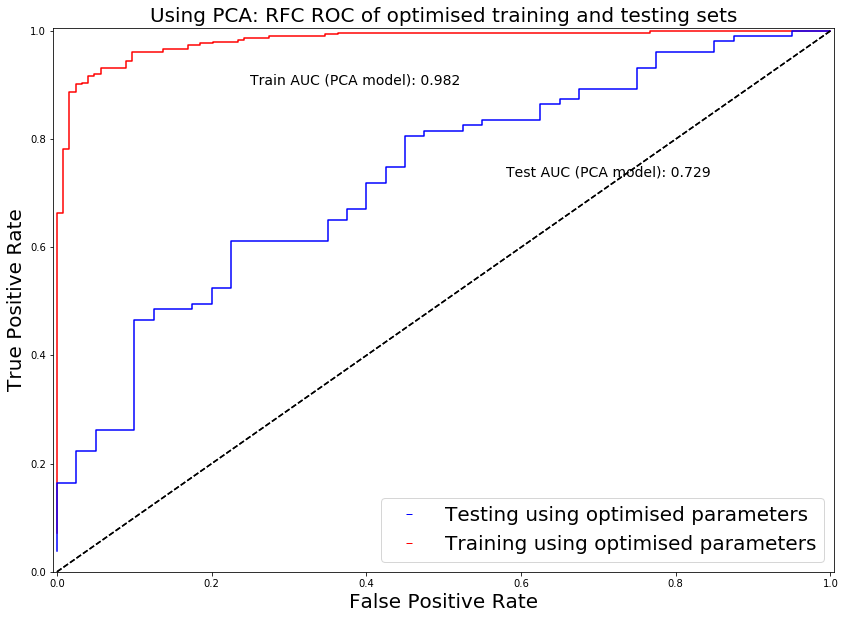

In [61]:
# ROC plot of optimised training and testing sets using PCA

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn import metrics

probs_train_rf_pca = classify_pca.predict_proba(X_train_pca)
preds_train_rf_pca = probs_train_rf_pca[:,1]
fpr_train_rf_pca, tpr_train_rf_pca, threshold_pca = metrics.roc_curve(y_train, preds_train_rf_pca)
roc_auc_pca = metrics.auc(fpr_train_rf_pca, tpr_train_rf_pca)

probs_test_rf_pca = classify_pca.predict_proba(X_test_pca)
preds_test_rf_pca = probs_test_rf_pca[:,1]
fpr_test_rf_pca, tpr_test_rf_pca, threshold_test_rf_pca = metrics.roc_curve(y_test, preds_test_rf_pca)
roc_auc1_pca = metrics.auc(fpr_test_rf_pca, tpr_test_rf_pca)

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
plt.title('Using PCA: RFC ROC of optimised training and testing sets', fontsize=20)

custom = [Line2D([], [], marker='_', color='b', linestyle='None'),
          Line2D([], [], marker='_', color='r', linestyle='None')]
plt.plot(fpr_train_rf_pca, tpr_train_rf_pca, 'r', fpr_test_rf_pca, tpr_test_rf_pca, 'b', [0, 1.0], [0, 1.0],'k--')
figsize=(5, 5)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.legend(custom, ['Testing using optimised parameters', 'Training using optimised parameters'], loc='lower right', fontsize=20)
plt.plot([0, 1.0], [0, 1.0],'k--', label='Random chance')
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.005])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.text(0.58, 0.73, 'Test AUC (PCA model): %s' % (round(metrics.auc(fpr_test_rf_pca, tpr_test_rf_pca), 3)), fontsize=14)
plt.text(0.25, 0.9, 'Train AUC (PCA model): %s' % (round(metrics.auc(fpr_train_rf_pca, tpr_train_rf_pca), 3)), fontsize=14)

#plt.savefig('Fig9p')
plt.show()

In [62]:
# K-Fold Cross Validation of the testing set using PCA

from sklearn.model_selection import cross_val_score
acc_k_pca = cross_val_score(estimator = classifier,
                            X = X_test_pca, y = y_test,
                            cv = 10, n_jobs = -1)

print'Showing all 10 of K-Fold Cross Validation accuracies:\n', (acc_k_pca)

acc_mean_pca = acc_k_pca.mean()*100
print'\nAccuracy mean:\n {0:.2f}%'.format(acc_mean_pca)

acc_std_pca = acc_k_pca.std()*100
print'\nStandard Deviation:\n +/- {0:.2f}%'.format(acc_std_pca)

Showing all 10 of K-Fold Cross Validation accuracies:
[0.6        0.6        0.73333333 0.5        0.64285714 0.71428571
 0.5        0.64285714 0.64285714 0.85714286]

Accuracy mean:
 64.33%

Standard Deviation:
 +/- 10.18%


# 7/. Support Vector Classifier

In [63]:
# Fitting Support Vector Classifier to the dataset

from sklearn.svm import SVC

classifier_svc = SVC()
classifier_svc.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [64]:
# Initial testing set prediction, done prior to any training to act as a baseline

from sklearn.metrics import classification_report
y_pred_test_svc = classifier_svc.predict(X_test_std)
test_acc_pr_svc = classification_report(y_test, y_pred_test_svc, labels=[1, 0])
print(test_acc_pr_svc)

cm_test_pred_svc = confusion_matrix(y_test, y_pred_test_svc)
print(cm_test_pred_svc)

# Finding the accuracy of the baseline testing set
TP = cm_test_pred_svc[1,1]
FP = cm_test_pred_svc[0,1]
TN = cm_test_pred_svc[0,0]
FN = cm_test_pred_svc[1,0]

accuracy_test__svc_pr = float(TP + TN) / float(TP + FP + TN + FN)
accuracy_test_svc_pred = accuracy_test__svc_pr*100

print'\nTest accuracy mean: {0:.2f}%' .format(np.mean(accuracy_test_svc_pred))

             precision    recall  f1-score   support

          1       0.72      0.99      0.83       103
          0       0.00      0.00      0.00        40

avg / total       0.52      0.71      0.60       143

[[  0  40]
 [  1 102]]

Test accuracy mean: 71.33%


In [65]:
# Initial Gridsearch to determine the best tuning parameters for the Support Vector Classification

from sklearn.metrics import roc_auc_score

parameters = parameter_grid = [
  {'C': [0.1, 1, 10, 50, 100, 300], 'kernel':['linear'],
   #'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10], 
   'class_weight': ['balanced', {1:2}, {1:3}, {1:4}, {1:5}, {1:10}],
   'random_state' : [120211]
  },
  {'C': [0.1, 1, 10, 50, 100, 300], 'kernel':['rbf'],
   'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10], 
   'class_weight': ['balanced', {1:2}, {1:3}, {1:4}, {1:5}, {1:10}]
  }
]

from sklearn.model_selection import GridSearchCV
grid_search_svc = GridSearchCV(estimator = classifier_svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1, cv = 10)
grid_search_svc.fit(X_train_std, y_train)

# Computational time to complete the grid search
%time grid_search_svc.fit(X_train_std, y_train)

# Calculating the best accuracy and best parameters for tuning of the hyperparameters
gs_score_svc = grid_search_svc.best_score_
print'Best accuracy - training set: \n', (gs_score_svc)

gs_par_svc = grid_search_svc.best_params_
print'\nBest parameters - training set: \n', (gs_par_svc)

CPU times: user 8.11 s, sys: 640 ms, total: 8.75 s
Wall time: 11min 40s
Best accuracy - training set: 
0.7517564402810304

Best parameters - training set: 
{'kernel': 'rbf', 'C': 10, 'gamma': 1, 'class_weight': {1: 4}}


In [66]:
# Gridsearch to generate an auc object

grid_search_auc_svc = GridSearchCV(estimator = classifier_svc, 
                             param_grid = parameters, 
                             scoring = 'roc_auc',
                             n_jobs = -1, cv = 10)
grid_search_auc_svc.fit(X_train_std, y_train) 

# Calculating AUC for the training set
gs_auc_svc = grid_search_auc_svc.best_score_
print'Best AUC training score: \n', (gs_auc_svc)

gs_par_auc_svc = grid_search_auc_svc.best_params_
print'\nBest AUC training parameters: \n', (gs_par_auc_svc)

Best AUC training score: 
0.7738123325643156

Best AUC training parameters: 
{'kernel': 'rbf', 'C': 300, 'gamma': 0.001, 'class_weight': 'balanced'}


In [67]:
# Calculating AUC for the testing set, along with predictions for both the training and the testing sets

y_pred_auc_svc_tr = grid_search_auc_svc.predict(X_train_std)
y_pred_auc_svc = grid_search_auc_svc.predict(X_test_std)
print'AUC testing score: \n {0:.2f}%' .format(roc_auc_score(y_test, y_pred_auc_svc)*100)

AUC testing score: 
 69.48%


In [69]:
# Support Vector Classifier hyperparameter tuning based on best_params results from the initial GridSearch
from sklearn.metrics import accuracy_score, make_scorer

classifier_svc = SVC(C = 10, 
                     kernel = 'rbf', 
                     gamma = 1, 
                     class_weight = {1:4},
                     probability = True)
            
classifier_svc.fit(X_train_std, y_train)

# Computational time to complete the optimised SVC modelling
%time classifier_svc.fit(X_train_std, y_train)

CPU times: user 39.8 ms, sys: 377 µs, total: 40.2 ms
Wall time: 40.4 ms


SVC(C=10, cache_size=200, class_weight={1: 4}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
# Training set optimised with Gridsearch carried out using tuned hyperparameters

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred_train_svc = classifier_svc.predict(X_train_std)
train_acc_opt_svc = classification_report(y_train, y_pred_train_svc)
print(train_acc_opt_svc)

cm_train_svc = confusion_matrix(y_train, y_pred_train_svc)
print(cm_train_svc)

# Finding accuracy of the optimised training set
TP = cm_train_svc[1,1]
FP = cm_train_svc[0,1]
TN = cm_train_svc[0,0]
FN = cm_train_svc[1,0]

accuracy_tr_svc = float(TP + TN) / float(TP + FP + TN + FN)
accuracy_train_svc = accuracy_tr_svc*100

print'\nTrain accuracy mean: {0:.2f}%' .format(np.mean(accuracy_train_svc))

             precision    recall  f1-score   support

          0       1.00      0.88      0.94       124
          1       0.95      1.00      0.98       303

avg / total       0.97      0.96      0.96       427

[[109  15]
 [  0 303]]

Train accuracy mean: 96.49%


In [71]:
# Testing set optimised with Gridsearch carried out using tuned hyperparameters

y_pred_test_svc = classifier_svc.predict(X_test_std)
test_acc_opt_svc = classification_report(y_test, y_pred_test_svc)
print(test_acc_opt_svc)

cm_test_svc = confusion_matrix(y_test, y_pred_test_svc)
print(cm_test_svc)

# Finding accuracy of the optimised testing set
TP = cm_test_svc[1,1]
FP = cm_test_svc[0,1]
TN = cm_test_svc[0,0]
FN = cm_test_svc[1,0]

accuracy_te_svc = float(TP + TN) / float(TP + FP + TN + FN)
accuracy_test_svc = accuracy_te_svc*100

print'\nTest accuracy mean: {0:.2f}%' .format(np.mean(accuracy_test_svc))

             precision    recall  f1-score   support

          0       0.31      0.25      0.28        40
          1       0.73      0.79      0.76       103

avg / total       0.61      0.64      0.62       143

[[10 30]
 [22 81]]

Test accuracy mean: 63.64%


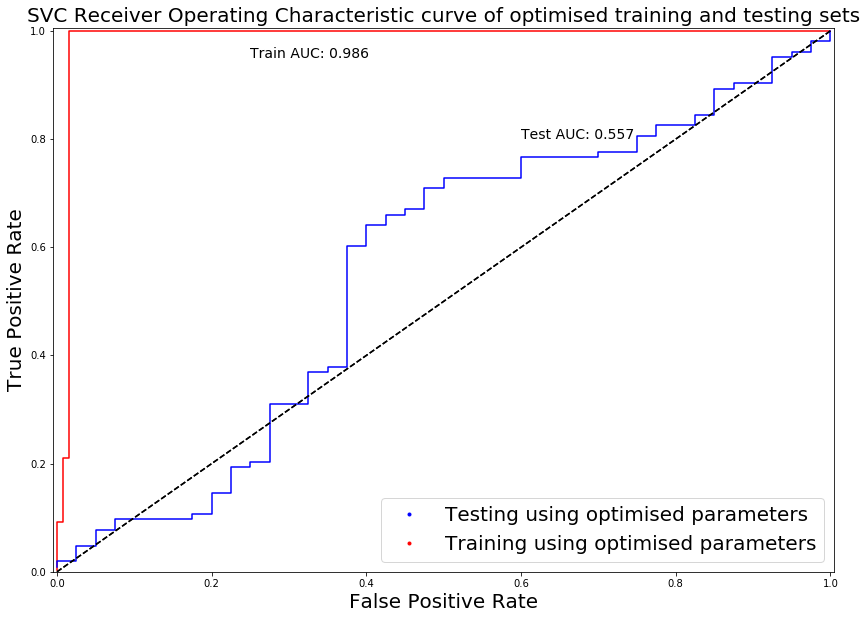

In [72]:
# ROC plot of optimised training and testing sets

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn import metrics

# Determine prediction using proba to get a continuous output
probs_train_svc = classifier_svc.predict_proba(X_train_std)
preds_train_svc = probs_train_svc[:,1]
fpr_train_svc, tpr_train_svc, threshold = metrics.roc_curve(y_train, preds_train_svc)
roc_auc_svc = metrics.auc(fpr_train_svc, tpr_train_svc)

probs_test_svc = classifier_svc.predict_proba(X_test_std)
preds_test_svc = probs_test_svc[:,1]
fpr_test_svc, tpr_test_svc, threshold_test_svc = metrics.roc_curve(y_test, preds_test_svc)
roc_auc1_svc = metrics.auc(fpr_test_svc, tpr_test_svc)

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
plt.title('SVC Receiver Operating Characteristic curve of optimised training and testing sets', fontsize=20)

custom = [Line2D([], [], marker='.', color='b', linestyle='None'),
          Line2D([], [], marker='.', color='r', linestyle='None')]
plt.plot(fpr_train_svc, tpr_train_svc, 'r', fpr_test_svc, tpr_test_svc, 'b', [0, 1.0], [0, 1.0],'k--')
figsize=(5, 5)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.legend(custom, ['Testing using optimised parameters', 'Training using optimised parameters'], loc='lower right', fontsize=20)
plt.plot([0, 1.0], [0, 1.0],'k--', label='Random chance')
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.005])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.text(0.6, 0.8, 'Test AUC: %s' % (round(metrics.auc(fpr_test_svc, tpr_test_svc), 3)), fontsize=14)
plt.text(0.25, 0.95, 'Train AUC: %s' % (round(metrics.auc(fpr_train_svc, tpr_train_svc), 3)), fontsize=14)

#plt.savefig('Fig10')
plt.show()

In [73]:
# K-Fold Cross Validation of the testing set

from sklearn.model_selection import cross_val_score
acc_k_svc = cross_val_score(estimator = classifier_svc,
                            X = X_test_std, y = y_test,
                            cv = 10, n_jobs = -1)

print'Showing all 10 of K-Fold Cross Validation accuracies:\n', (acc_k_svc)

acc_mean_svc = acc_k_svc.mean()*100
print'\nAccuracy mean:\n {0:.2f}%'.format(acc_mean_svc)

acc_std_svc = acc_k_svc.std()*100
print'\nStandard deviation:\n +/- {0:.2f}%'.format(acc_std_svc)


Showing all 10 of K-Fold Cross Validation accuracies:
[0.66666667 0.66666667 0.8        0.64285714 0.78571429 0.57142857
 0.57142857 0.5        0.85714286 0.78571429]

Accuracy mean:
 68.48%

Standard deviation:
 +/- 11.21%


# 8/. Support Vector Classifier - Hyperparameter sensitivity testing 

In [74]:
# Sensitivity analysis of the Hyperparameter tuning of the Support Vector Classifier

# Adjusting the 'C' value to explore its affects on the SVC model: 0.1, 1, 50, 100, 300
classifier_svc_0_1 = SVC(C = 0.1, 
                     kernel = 'rbf', 
                     gamma = 1, 
                     class_weight = {1:4},
                     probability = True)
            
classifier_svc_0_1.fit(X_train_std, y_train)


classifier_svc_1 = SVC(C = 1, 
                     kernel = 'rbf', 
                     gamma = 1, 
                     class_weight = {1:4},
                     probability = True)
            
classifier_svc_1.fit(X_train_std, y_train)


classifier_svc_50 = SVC(C = 50, 
                     kernel = 'rbf', 
                     gamma = 1, 
                     class_weight = {1:4},
                     probability = True)
            
classifier_svc_50.fit(X_train_std, y_train)


classifier_svc_100 = SVC(C = 100, 
                     kernel = 'rbf', 
                     gamma = 1, 
                     class_weight = {1:4},
                     probability = True)
            
classifier_svc_100.fit(X_train_std, y_train)


classifier_svc_300 = SVC(C = 300, 
                     kernel = 'rbf', 
                     gamma = 1, 
                     class_weight = {1:4},
                     probability = True)
            
classifier_svc_300.fit(X_train_std, y_train)



# Keeping the 'C' value = 10, gamma was varied on the SVC model: 0.0001, 0.001, 0.01, 0.1, 1, 10
classifier_svc_g0_0001 = SVC(C = 10, 
                     kernel = 'rbf', 
                     gamma = 0.0001, 
                     class_weight = {1:4},
                     probability = True)
            
classifier_svc_g0_0001.fit(X_train_std, y_train)


classifier_svc_g0_001 = SVC(C = 10, 
                     kernel = 'rbf', 
                     gamma = 0.001, 
                     class_weight = {1:4},
                     probability = True)
            
classifier_svc_g0_001.fit(X_train_std, y_train)


classifier_svc_g0_01 = SVC(C = 10, 
                     kernel = 'rbf', 
                     gamma = 0.01, 
                     class_weight = {1:4},
                     probability = True)
            
classifier_svc_g0_01.fit(X_train_std, y_train)


classifier_svc_g0_1 = SVC(C = 10, 
                     kernel = 'rbf', 
                     gamma = 0.1, 
                     class_weight = {1:4},
                     probability = True)
            
classifier_svc_g0_1.fit(X_train_std, y_train)


classifier_svc_g10 = SVC(C = 10, 
                     kernel = 'rbf', 
                     gamma = 10, 
                     class_weight = {1:4},
                     probability = True)
            
classifier_svc_g10.fit(X_train_std, y_train)


# Keeping the 'C' value = 10 and gamma = 1, class weight was varied on the SVC model: 'balanced', {1:2}, {1:3}, {1:5}, {1:10}
classifier_svc_c2 = SVC(C = 10, 
                     kernel = 'rbf', 
                     gamma = 1, 
                     class_weight = {1:2},
                     probability = True)
            
classifier_svc_c2.fit(X_train_std, y_train)


classifier_svc_c3 = SVC(C = 10, 
                     kernel = 'rbf', 
                     gamma = 1, 
                     class_weight = {1:3},
                     probability = True)
            
classifier_svc_c3.fit(X_train_std, y_train)


classifier_svc_c5 = SVC(C = 10, 
                     kernel = 'rbf', 
                     gamma = 1, 
                     class_weight = {1:5},
                     probability = True)
            
classifier_svc_c5.fit(X_train_std, y_train)


classifier_svc_c10 = SVC(C = 10, 
                     kernel = 'rbf', 
                     gamma = 1, 
                     class_weight = {1:10},
                     probability = True)
            
classifier_svc_c10.fit(X_train_std, y_train)


SVC(C=10, cache_size=200, class_weight={1: 10}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
# Exploring the max_depth, when max_depth = 2, 5, 7, 9, 10 or 12
y_pred_svc_0_1 = classifier_svc_0_1.predict(X_test_std)
test_acc_svc_0_1 = classification_report(y_test, y_pred_svc_0_1, labels=[1, 0])
print'\n\n\nC = 0.1 :\n', (test_acc_svc_0_1)
acc_svc_0_1 = classifier_svc_0_1.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_svc_0_1)

y_pred_svc_1 = classifier_svc_1.predict(X_test_std)
test_acc_svc_1 = classification_report(y_test, y_pred_svc_1, labels=[1, 0])
print'\n\n\nC = 1 :\n', (test_acc_svc_1)
acc_svc_1 = classifier_svc_1.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_svc_1)

y_pred_svc_50 = classifier_svc_50.predict(X_test_std)
test_acc_svc_50 = classification_report(y_test, y_pred_svc_50, labels=[1, 0])
print'\n\n\nC = 50 :\n', (test_acc_svc_50)
acc_svc_50 = classifier_svc_50.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_svc_50)

y_pred_svc_100 = classifier_svc_100.predict(X_test_std)
test_acc_svc_100 = classification_report(y_test, y_pred_svc_100, labels=[1, 0])
print'\n\n\nC = 100 :\n', (test_acc_svc_100)
acc_svc_100 = classifier_svc_100.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_svc_100)

y_pred_svc_300 = classifier_svc_300.predict(X_test_std)
test_acc_svc_300 = classification_report(y_test, y_pred_svc_300, labels=[1, 0])
print'\n\n\nC = 300 :\n', (test_acc_svc_300)
acc_svc_300 = classifier_svc_300.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_svc_300)


# Keeping the 'C' value = 10, gamma was varied on the SVC model: 0.0001, 0.001, 0.01, 0.1, 1, 10
y_pred_svc_g0_0001 = classifier_svc_g0_0001.predict(X_test_std)
test_acc_svc_g0_0001= classification_report(y_test, y_pred_svc_g0_0001, labels=[1, 0])
print'\n\n\nGamma = 0.0001:\n', (test_acc_svc_g0_0001)
acc_g0_0001 = classifier_svc_g0_0001.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_g0_0001)


y_pred_svc_g0_001 = classifier_svc_g0_001.predict(X_test_std)
test_acc_svc_g0_001= classification_report(y_test, y_pred_svc_g0_001, labels=[1, 0])
print'\n\n\nGamma = 0.001:\n', (test_acc_svc_g0_001)
acc_g0_001 = classifier_svc_g0_001.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_g0_001)


y_pred_svc_g0_01 = classifier_svc_g0_01.predict(X_test_std)
test_acc_svc_g0_01= classification_report(y_test, y_pred_svc_g0_01, labels=[1, 0])
print'\n\n\nGamma = 0.01:\n', (test_acc_svc_g0_01)
acc_g0_01 = classifier_svc_g0_01.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_g0_01)


y_pred_svc_g0_1 = classifier_svc_g0_1.predict(X_test_std)
test_acc_svc_g0_1= classification_report(y_test, y_pred_svc_g0_1, labels=[1, 0])
print'\n\n\nGamma = 0.1:\n', (test_acc_svc_g0_1)
acc_g0_1 = classifier_svc_g0_1.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_g0_1)


y_pred_svc_g10 = classifier_svc_g10.predict(X_test_std)
test_acc_svc_g10 = classification_report(y_test, y_pred_svc_g10, labels=[1, 0])
print'\n\n\nGamma = 10:\n', (test_acc_svc_g10)
acc_svc_g10 = classifier_svc_g10.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_svc_g10)


# Keeping the 'C' value = 10 and gamma = 1, class weight was varied on the SVC model: 'balanced', {1:2}, {1:3}, {1:5}, {1:10}
y_pred_svc_c2 = classifier_svc_c2.predict(X_test_std)
test_acc_svc_c2 = classification_report(y_test, y_pred_svc_c2, labels=[1, 0])
print'\n\n\nClass weight = 2:\n', (test_acc_svc_c2)
acc_svc_c2 = classifier_svc_c2.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_svc_c2)


y_pred_svc_c3 = classifier_svc_c3.predict(X_test_std)
test_acc_svc_c3 = classification_report(y_test, y_pred_svc_c3, labels=[1, 0])
print'\n\n\nClass weight = 3:\n', (test_acc_svc_c3)
acc_svc_c3 = classifier_svc_c3.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_svc_c3)


y_pred_svc_c5 = classifier_svc_c5.predict(X_test_std)
test_acc_svc_c5 = classification_report(y_test, y_pred_svc_c5, labels=[1, 0])
print'\n\n\nClass weight = 5:\n', (test_acc_svc_c5)
acc_svc_c5 = classifier_svc_c5.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_svc_c5)


y_pred_svc_c10 = classifier_svc_c10.predict(X_test_std)
test_acc_svc_c10 = classification_report(y_test, y_pred_svc_c10, labels=[1, 0])
print'\n\n\nClass weight = 10:\n', (test_acc_svc_c10)
acc_svc_c10 = classifier_svc_c10.score(X_test_std, y_test)*100
print'Accuracy score:   {0:.2f}%'.format(acc_svc_c10)





C = 0.1 :
             precision    recall  f1-score   support

          1       0.72      1.00      0.84       103
          0       0.00      0.00      0.00        40

avg / total       0.52      0.72      0.60       143

Accuracy score:   72.03%



C = 1 :
             precision    recall  f1-score   support

          1       0.72      0.95      0.82       103
          0       0.17      0.03      0.04        40

avg / total       0.56      0.69      0.60       143

Accuracy score:   69.23%



C = 50 :
             precision    recall  f1-score   support

          1       0.76      0.79      0.78       103
          0       0.41      0.38      0.39        40

avg / total       0.66      0.67      0.67       143

Accuracy score:   67.13%



C = 100 :
             precision    recall  f1-score   support

          1       0.76      0.79      0.77       103
          0       0.39      0.35      0.37        40

avg / total       0.65      0.66      0.66       143

Accuracy score: 

/Users/db/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Support Vector Classifier - sensitivity analysis using Principle Components Analysis (PCA)

In [76]:
sensit_pca = PCA(n_components = 6)
X_train_pca  = sensit_pca.fit_transform(X_train_std)
X_test_pca = sensit_pca.transform(X_test_std)

In [77]:
# Fitting Support Vector Classifier to the dataset using PCA

from sklearn.svm import SVC

classifier_svc_pca = SVC()
classifier_svc_pca.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
# Gridsearch to determine the best tuning parameters for the Support Vector Classification using PCA

from sklearn.metrics import roc_auc_score

param_svc_pca = parameter_grid = [
  {'C': [0.1, 1, 10, 50, 100, 300], 'kernel':['linear'],
   #'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10], 
   'class_weight': ['balanced', {1:2}, {1:3}, {1:4}, {1:5}, {1:10}],
   'random_state' : [120211]
  },
  {'C': [0.1, 1, 10, 50, 100, 300], 'kernel':['rbf'],
   'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10], 
   'class_weight': ['balanced', {1:2}, {1:3}, {1:4}, {1:5}, {1:10}]
  }
]

from sklearn.model_selection import GridSearchCV
grid_search_svc_pca = GridSearchCV(estimator = classifier_svc_pca,
                           param_grid = param_svc_pca,
                           scoring = 'accuracy',
                           n_jobs = -1, cv = 10)
grid_search_svc_pca.fit(X_train_pca, y_train)

# Computational time to complete the grid search
%time grid_search_svc_pca.fit(X_train_pca, y_train)

# Calculating the best accuracy and best parameters for tuning of the hyperparameters
gs_score_svc_pca = grid_search_svc_pca.best_score_
print'\nBest accuracy - training set: \n', (gs_score_svc_pca)

gs_par_svc_pca = grid_search_svc_pca.best_params_
print'\nBest parameters - training set: \n', (gs_par_svc_pca)

CPU times: user 7.85 s, sys: 603 ms, total: 8.45 s
Wall time: 10min 21s

Best accuracy - training set: 
0.7142857142857143

Best parameters - training set: 
{'kernel': 'rbf', 'C': 10, 'gamma': 0.1, 'class_weight': {1: 2}}


In [79]:
# Gridsearch to generate an auc object using PCA

grid_search_auc_svc_pca = GridSearchCV(estimator = classifier_svc_pca, 
                             param_grid = parameters, 
                             scoring = 'roc_auc',
                             n_jobs = -1, cv = 10)
grid_search_auc_svc_pca.fit(X_train_pca, y_train) 

# Calculating AUC for the training set
gs_auc_svc_pca = grid_search_auc_svc_pca.best_score_
print'\nBest AUC training score: \n', (gs_auc_svc_pca)

gs_par_auc_svc_pca = grid_search_auc_svc_pca.best_params_
print'\nBest AUC training parameters: \n', (gs_par_auc_svc_pca)


Best AUC training score: 
0.7726037931749196

Best AUC training parameters: 
{'kernel': 'linear', 'C': 1, 'random_state': 120211, 'class_weight': 'balanced'}


In [80]:
# Calculating AUC for the testing set, along with predictions for both the training and the testing sets using PCA

y_pred_auc_svc_tr_pca = grid_search_auc_svc_pca.predict(X_train_pca)
y_pred_auc_svc_pca = grid_search_auc_svc_pca.predict(X_test_pca)
print'AUC testing score: \n {0:.2f}%' .format(roc_auc_score(y_test, y_pred_auc_svc_pca)*100)

AUC testing score: 
 69.48%


In [81]:
# Support Vector Classifier hyperparameter tuning based on best_params results from the initial GridSearch using PCA
from sklearn.metrics import accuracy_score, make_scorer

classify_svc_pca = SVC(C = 10, 
                     kernel = 'rbf', 
                     gamma = 0.1, 
                     class_weight = {1: 2},
                     probability = True)
            
classify_svc_pca.fit(X_train_pca, y_train)

# Computational time to complete the optimised SVC modelling
%time classify_svc_pca.fit(X_train_pca, y_train)

CPU times: user 27.8 ms, sys: 260 µs, total: 28.1 ms
Wall time: 28.3 ms


SVC(C=10, cache_size=200, class_weight={1: 2}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
# Training set optimised with Gridsearch carried out using tuned hyperparameters using PCA

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred_train_svc_pca = classify_svc_pca.predict(X_train_pca)
train_acc_opt_svc_pca = classification_report(y_train, y_pred_train_svc_pca)
print(train_acc_opt_svc_pca)

cm_train_svc_pca = confusion_matrix(y_train, y_pred_train_svc_pca)
print(cm_train_svc_pca)

# Finding accuracy of the optimised training set
TP = cm_train_svc_pca[1,1]
FP = cm_train_svc_pca[0,1]
TN = cm_train_svc_pca[0,0]
FN = cm_train_svc_pca[1,0]

accuracy_tr_svc_pca = float(TP + TN) / float(TP + FP + TN + FN)
accuracy_train_svc_pca = accuracy_tr_svc_pca*100

print'\nTrain accuracy mean: {0:.2f}%' .format(np.mean(accuracy_train_svc_pca))

             precision    recall  f1-score   support

          0       0.90      0.07      0.13       124
          1       0.72      1.00      0.84       303

avg / total       0.78      0.73      0.63       427

[[  9 115]
 [  1 302]]

Train accuracy mean: 72.83%


In [83]:
# Testing set optimised with Gridsearch carried out using tuned hyperparameters using PCA

y_pred_test_svc_pca = classify_svc_pca.predict(X_test_pca)
test_acc_opt_svc_pca = classification_report(y_test, y_pred_test_svc_pca)
print(test_acc_opt_svc_pca)

cm_test_svc_pca = confusion_matrix(y_test, y_pred_test_svc_pca)
print(cm_test_svc_pca)

# Finding accuracy of the optimised testing set
TP = cm_test_svc_pca[1,1]
FP = cm_test_svc_pca[0,1]
TN = cm_test_svc_pca[0,0]
FN = cm_test_svc_pca[1,0]

accuracy_te_svc_pca = float(TP + TN) / float(TP + FP + TN + FN)
accuracy_test_svc_pca = accuracy_te_svc_pca*100

print'\nTest accuracy mean: {0:.2f}%' .format(np.mean(accuracy_test_svc_pca))


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        40
          1       0.71      0.97      0.82       103

avg / total       0.51      0.70      0.59       143

[[  0  40]
 [  3 100]]

Test accuracy mean: 69.93%


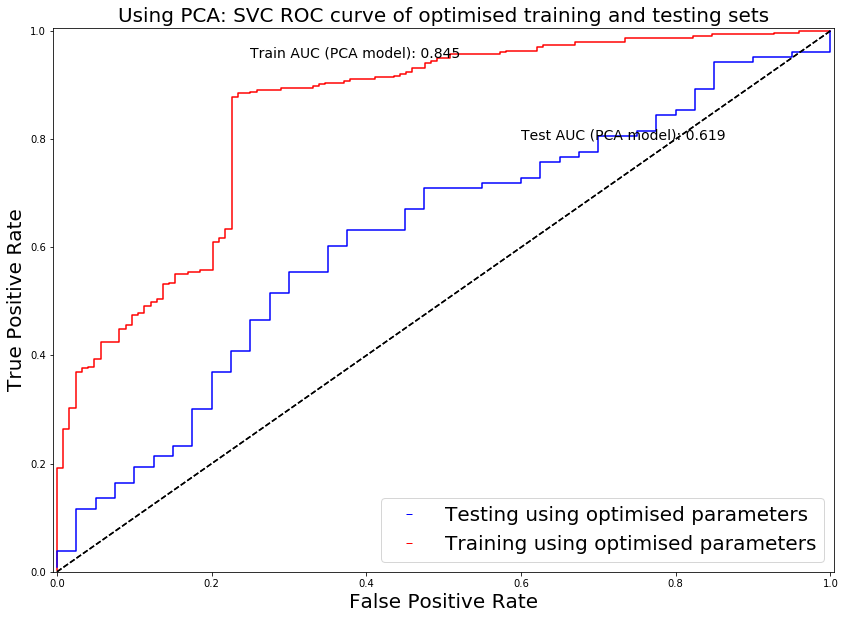

In [84]:
# ROC plot of optimised training and testing sets using PCA

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn import metrics

# Determine prediction using proba to get a continuous output
probs_train_svc_pca = classify_svc_pca.predict_proba(X_train_pca)
preds_train_svc_pca = probs_train_svc_pca[:,1]
fpr_train_svc_pca, tpr_train_svc_pca, threshold_pca = metrics.roc_curve(y_train, preds_train_svc_pca)
roc_auc_svc_pca = metrics.auc(fpr_train_svc_pca, tpr_train_svc_pca)

probs_test_svc_pca = classify_svc_pca.predict_proba(X_test_pca)
preds_test_svc_pca = probs_test_svc_pca[:,1]
fpr_test_svc_pca, tpr_test_svc_pca, threshold_test_svc_pca = metrics.roc_curve(y_test, preds_test_svc_pca)
roc_auc1_svc_pca = metrics.auc(fpr_test_svc_pca, tpr_test_svc_pca)

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
plt.title('Using PCA: SVC ROC curve of optimised training and testing sets', fontsize=20)

custom = [Line2D([], [], marker='_', color='b', linestyle='None'),
          Line2D([], [], marker='_', color='r', linestyle='None')]
plt.plot(fpr_train_svc_pca, tpr_train_svc_pca, 'r', fpr_test_svc_pca, tpr_test_svc_pca, 'b', [0, 1.0], [0, 1.0],'k--')
figsize=(5, 5)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.legend(custom, ['Testing using optimised parameters', 'Training using optimised parameters'], loc='lower right', fontsize=20)
plt.plot([0, 1.0], [0, 1.0],'k--', label='Random chance')
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.005])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.text(0.6, 0.8, 'Test AUC (PCA model): %s' % (round(metrics.auc(fpr_test_svc_pca, tpr_test_svc_pca), 3)), fontsize=14)
plt.text(0.25, 0.95, 'Train AUC (PCA model): %s' % (round(metrics.auc(fpr_train_svc_pca, tpr_train_svc_pca), 3)), fontsize=14)

#plt.savefig('Fig10p')
plt.show()

In [85]:
# K-Fold Cross Validation of the testing set using PCA

from sklearn.model_selection import cross_val_score

acc_k_svc_pca = cross_val_score(estimator = classify_svc_pca,
                            X = X_test_pca, y = y_test,
                            cv = 10, n_jobs = -1)

print'\nShowing all 10 of K-Fold Cross Validation accuracies:\n', (acc_k_svc_pca)

acc_mean_svc_pca = acc_k_svc_pca.mean()*100
print'\nAccuracy mean:\n {0:.2f}%'.format(acc_mean_svc_pca)

acc_std_svc_pca = acc_k_svc_pca.std()*100
print'\nStandard deviation:\n +/- {0:.2f}%'.format(acc_std_svc_pca)



Showing all 10 of K-Fold Cross Validation accuracies:
[0.73333333 0.53333333 0.73333333 0.71428571 0.78571429 0.78571429
 0.64285714 0.64285714 0.71428571 0.71428571]

Accuracy mean:
 70.00%

Standard deviation:
 +/- 7.20%
